# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
#from scipy.stats import linregress
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Import API key
from api_keys import weather_api_key

# under VBA add this line to .iginore to gnore the push/ modification of the config.py file
# api_keys.py

In [3]:
# Output File CSV
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations-- numpy, generate 1500 lats, lngs a piece
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# the url info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
# url Query build
Q_url = f"{url}appid={weather_api_key}&units={units}&q="
## url = f"http://api.openweathermap.org/data/2.5/weather?units-imperial&APPID={weather_api_key}"

In [8]:
# Get city weather data
weather_response = requests.get(Q_url + city)
weather_json = weather_response.json()
# converts a Python object into a json string-- dumps
print(json.dumps(weather_json, indent=6))
#print(weather_json)

{
      "cod": "404",
      "message": "city not found"
}


In [9]:
# set empty for list of variables
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# start record counting
processing_record = 1 

print(weather_response)
#print(cities)

<Response [404]>


In [10]:
# data retrive process start

# print to logger
print(f"Beginning Data Retrieval      ")
print(f"------------------------------")

# Loop through each city
for city in cities:
    
    # try to get the response for each city
    try:
        response = requests.get(Q_url + city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # increase record counting by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    pass

print(f"------------------------------")
print(f"Data Retrieval Complete!!    ")
print(f"------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 | Dzhebariki-Khaya
Processing Record 2 | Norman Wells
Processing Record 3 | Turba
Processing Record 4 | New Norfolk
Processing Record 5 | Koslan
Processing Record 6 | Prince Rupert
City not found. Skipping...
Processing Record 7 | Butaritari
Processing Record 8 | Husavik
Processing Record 9 | São José da Coroa Grande
Processing Record 10 | Zeerust
Processing Record 11 | Bethel
Processing Record 12 | Tiksi
City not found. Skipping...
Processing Record 13 | Iqaluit
Processing Record 14 | Busselton
Processing Record 15 | Arraial do Cabo
Processing Record 16 | Rocha
Processing Record 17 | Cape Town
Processing Record 18 | Coos Bay
Processing Record 19 | Saldanha
City not found. Skipping...
City not found. Skipping...
Processing Record 20 | Ushuaia
Processing Record 21 | Mataura
Processing Record 22 | Vysokopillya
City not found. Skipping...
Processing Record 23 | Kapaa
Processing Record 24 | Kimbe
City not fou

Processing Record 225 | Kirkuk
Processing Record 226 | Morondava
Processing Record 227 | Tabou
Processing Record 228 | Llangefni
Processing Record 229 | Aksha
Processing Record 230 | Pīpri
Processing Record 231 | Cape Canaveral
Processing Record 232 | Ixtapa
Processing Record 233 | Andenes
City not found. Skipping...
Processing Record 234 | Yerofey Pavlovich
Processing Record 235 | Barra do Garças
Processing Record 236 | Kaeo
Processing Record 237 | Hambantota
Processing Record 238 | Micheweni
Processing Record 239 | Nurota
Processing Record 240 | Opuwo
Processing Record 241 | Benghazi
Processing Record 242 | Kanniyākumāri
Processing Record 243 | Lorengau
Processing Record 244 | Sola
Processing Record 245 | Zhigansk
Processing Record 246 | Muros
Processing Record 247 | Brownwood
Processing Record 248 | Cootamundra
Processing Record 249 | Melo
Processing Record 250 | Meaford
Processing Record 251 | Khovd
Processing Record 252 | Hualmay
Processing Record 253 | Ojinaga
Processing Record 2

Processing Record 456 | Lompoc
Processing Record 457 | Zyryanka
Processing Record 458 | Saint George
Processing Record 459 | Calatayud
Processing Record 460 | Meridian
Processing Record 461 | Jieshi
Processing Record 462 | Kormilovka
Processing Record 463 | Remedios
Processing Record 464 | Dakoro
Processing Record 465 | Houston
Processing Record 466 | Jaisalmer
Processing Record 467 | Oranjemund
Processing Record 468 | Qaqortoq
Processing Record 469 | Darhan
Processing Record 470 | Inuvik
Processing Record 471 | Nipawin
Processing Record 472 | Kenai
Processing Record 473 | Kyotera
Processing Record 474 | Mayo
Processing Record 475 | Pyn U Lwin
Processing Record 476 | Diapaga
Processing Record 477 | Buraidah
Processing Record 478 | Burnie
Processing Record 479 | Panjakent
Processing Record 480 | Broome
Processing Record 481 | Upernavik
Processing Record 482 | Coari
Processing Record 483 | Chumikan
Processing Record 484 | Asheboro
Processing Record 485 | Loudéac
Processing Record 486 | A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# define dataframe then display
weather_data = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weatherDF = pd.DataFrame(weather_data)

weatherDF.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dzhebariki-Khaya,62.2167,135.8000,-36.89,100,77,1.08,RU,1644431092
1,Norman Wells,65.2820,-126.8329,-22.98,59,100,11.83,CA,1644431092
2,Turba,59.0831,24.2250,1.88,96,100,5.66,EE,1644431093
3,New Norfolk,-42.7826,147.0587,14.72,65,84,0.45,AU,1644431093
4,Koslan,63.4564,48.8989,-9.66,94,100,5.22,RU,1644430818


In [12]:
# export data to CSV file
weatherDF.to_csv("Weather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Date
# count	550.000000	550.000000	550.000000	550.000000	550.000000	550.000000	5.500000e+02

In [ ]:
# Get the indices of cities that have humidity over 100%.
# Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# 0	butaritari	3.07	172.79	83.32	74	84	10.42	KI	1593605283

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
## Create a series of scatter plots to showcase the following relationships:
#  Temperature (F) vs. Latitude
#  Humidity (%) vs. Latitude
#  Cloudiness (%) vs. Latitude
#  Wind Speed (mph) vs. Latitude

In [ ]:
## Save plot to the selected directory. If the directory does not exist, it is created.

#import os
#import matplotlib.pyplot as plt

#script_dir = os.path.dirname(__file__)
#results_dir = os.path.join(script_dir, 'Results/')
#plot_file_name = "CityLatitude_vs_Temperature"

#if not os.path.isdir(results_dir):
#    os.makedirs(results_dir)

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.savefig(results_dir + sample_file_name)

## Latitude vs. Temperature Plot

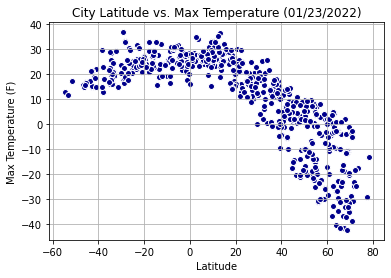

The relationship between City Latitude and Temperature shows as the scatter plot above. 

All latitude lines are parallel from East to West as circles to the equator, 
Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. 



<Figure size 432x288 with 0 Axes>

In [39]:
# Create a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weatherDF['Latitude'], weatherDF["Temp"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

# save plot as png file
plt.savefig("CityLatitude_vs_Temperature.png")

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Temperature shows as the scatter plot above. \n" 
      "\n"
      "All latitude lines are parallel from East to West as circles to the equator, \n"
      "Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. \n"+'\033[0m')

## Latitude vs. Humidity Plot

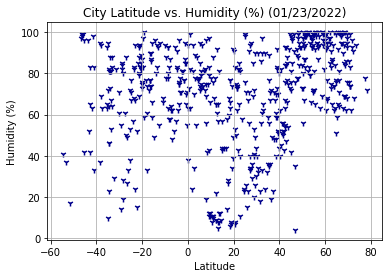

The relationship between City Latitude and Humidity shows as the scatter plot above. 
Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)
then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude 
will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.



<Figure size 432x288 with 0 Axes>

In [53]:
# Create a scatter plot for Humidity (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], facecolors = "darkblue", edgecolor ="white", marker="1")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (01/23/2022)")

plt.grid()
plt.show()

# save plot as png file
plt.savefig("CityLatitude_vs_Humidity.png")

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Humidity shows as the scatter plot above. \n" 
      "Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)\n"
      "then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude \n"
      "will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.\n"
      +'\033[0m')

## Latitude vs. Cloudiness Plot

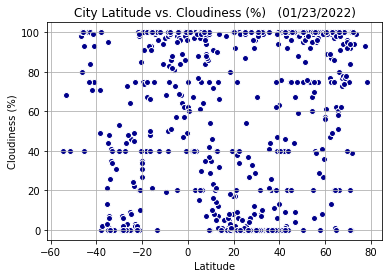

The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. 
Clouds tend to form in abundance in the middle latitudes 0, 40 and 100 degrees north and south of the equator.
There are three broad bands where Earth’s skies are most likely to be cloudy. 



<Figure size 432x288 with 0 Axes>

In [54]:
# Create a scatter plot for Cloudiness (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Cloudiness"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)   (01/23/2022)")

plt.grid()
plt.show()

# save plot as png file
plt.savefig("CityLatitude_vs_Cloudiness.png")

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. \n" 
      "Clouds tend to form in abundance in the middle latitudes to north and south of the equator.\n"
      "There are three broad bands where Earth’s skies are most likely to be cloudy. \n"
      +'\033[0m')

## Latitude vs. Wind Speed Plot

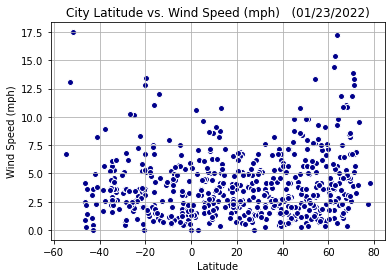

The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. 
the speed of wind is determined by the magnitude of the air pressure difference make the air move 
from high pressure to low.  with greater speeds resulting from greater air pressure differences.
Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. 



<Figure size 432x288 with 0 Axes>

In [57]:
#Create a scatter plot for Wind Speed (mph) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Wind Speed"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)   (01/23/2022)")

plt.grid()
plt.show()

# save plot as png file
plt.savefig("CityLatitude_vs_WindSpeed.png")

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. \n" 
      "the speed of wind is determined by the magnitude of the air pressure difference make the air move \n"
      "from high pressure to low.  with greater speeds resulting from greater air pressure differences.\n"
      "Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. \n"
      +'\033[0m')

## Linear Regression

In [ ]:
# run linear regression on each relationship. 
# Separate the plots into Northern Hemisphere (>=0 degrees latitude) and Southern Hemisphere (<0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# explain what the linear regression is modeling. Describe any relationships and any other analysis

#final notebook must:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression